# PW4: Genetic algorithms for optimization
*Alexandra Korukova, Samuel Mayor*  
*HEIG-VD - MLG - 30.05.2019*

In [1]:
from scipy import sin, cos, tan, arctan, arctan2, arccos, pi
import numpy as np
import math
from pyevolve import G1DList
from pyevolve import GSimpleGA
from pyevolve import GAllele
from pyevolve import Mutators
from pyevolve import Initializators
from pyevolve import DBAdapters
from pyevolve import Crossovers
from pyevolve import Consts
import sys, random
import matplotlib.pyplot as plt

In [2]:
LAT = [16.47, 16.47, 20.09, 22.39, 25.23, 22.00, 20.47, 17.20, 16.30, 14.05, 16.53, 21.52, 19.41, 20.09]

LON = [96.10, 94.44, 92.54, 93.37, 97.24, 96.05, 97.02, 96.29, 97.38, 98.12, 97.38, 95.59, 97.13, 94.55]

In [3]:
def tour_length(matrix, tour):
   """ Returns the total length of the tour """
   total=0
   num_cities=len(tour)
   for i in range(num_cities):
      j=(i+1)%num_cities
      city_i=tour[i]
      city_j=tour[j]
      total+=matrix[city_i,city_j]
   return total

def G1DListTSPInitializator(genome, **args):
   """ The initializator for the TSP """
   genome.clearList()
   lst = [i for i in xrange(genome.getListSize())]

   for i in xrange(genome.getListSize()):
      choice = random.choice(lst)
      lst.remove(choice)
      genome.append(choice)

spherical_distances = []
coords = []

def eval_func(chromosome):
   """ The evaluation function """
   global spherical_distances
   return tour_length(spherical_distances, chromosome)

In [4]:
# source : https://www.johndcook.com/blog/python_longitude_latitude/
def spherical_distance(lat1, long1, lat2, long2):

    # Convert latitude and longitude to
    # spherical coordinates in radians.
    degrees_to_radians = math.pi/180.0

    # phi = 90 - latitude
    phi1 = (90.0 - lat1)*degrees_to_radians
    phi2 = (90.0 - lat2)*degrees_to_radians

    # theta = longitude
    theta1 = long1*degrees_to_radians
    theta2 = long2*degrees_to_radians

    # Compute spherical distance from spherical coordinates.

    # For two locations in spherical coordinates
    # (1, theta, phi) and (1, theta', phi')
    # cosine( arc length ) =
    # sin phi sin phi' cos(theta-theta') + cos phi cos phi'
    # distance = rho * arc length

    cos = (math.sin(phi1)*math.sin(phi2)*math.cos(theta1 - theta2) +
    math.cos(phi1)*math.cos(phi2))
    arc = math.acos( cos )

    # Remember to multiply arc by the radius of the earth
    # in your favorite set of units to get length.
    return arc*6371

In [5]:
# creates latitude/longitude tuples for each city
coords = []
for i in range(len(LAT)):
    coords.append((LAT[i], LON[i]))

# calculate distances between each city pairs
spherical_distances = np.zeros((14, 14))
for i,c1 in enumerate(coords):
    for j,c2 in enumerate(coords):
        spherical_distances[i, j] = spherical_distance(c1[0], c1[1], c2[0], c2[1])

# set the alleles to the cities numbers
setOfAlleles = GAllele.GAlleles(homogeneous=True)
lst = [ i for i in xrange(len(coords)) ]
a = GAllele.GAlleleList(lst)
setOfAlleles.add(a)

genome = G1DList.G1DList(len(coords))
genome.setParams(allele=setOfAlleles)

genome.evaluator.set(eval_func)
genome.mutator.set(Mutators.G1DListMutatorSwap)
genome.crossover.set(Crossovers.G1DListCrossoverOX)
genome.initializator.set(G1DListTSPInitializator)

ga = GSimpleGA.GSimpleGA(genome)
ga.setGenerations(i)
ga.setMinimax(Consts.minimaxType["minimize"])
ga.setCrossoverRate(1.0)
ga.setMutationRate(0.03)
ga.setPopulationSize(80)

ga.evolve(freq_stats=100)
best = ga.bestIndividual()
print best
print(tour_length(spherical_distances, best))


Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8031.12(8262.76)/5208.89(4952.12)/6692.60(6692.60)]
Gen. 13 (100.00%): Max/Min/Avg Fitness(Raw) [4842.83(6189.52)/3925.70(3742.17)/4035.69(4035.69)]
Total time elapsed: 0.111 seconds.
- GenomeBase
	Score:			 3742.174101
	Fitness:		 3925.698596

	Params:		 {'allele': - GAlleles
	Homogeneous:	 True
	List size:	 1
	Alleles:

Allele for 0 position:
- GAlleleList
	List size:	 14
	Allele Options:	 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

}

	Slot [Evaluator] (Count: 1)
		Name: eval_func - Weight: 0.50
		Doc:  The evaluation function 
	Slot [Initializator] (Count: 1)
		Name: G1DListTSPInitializator - Weight: 0.50
		Doc:  The initializator for the TSP 
	Slot [Mutator] (Count: 1)
		Name: G1DListMutatorSwap - Weight: 0.50
		Doc:  The mutator of G1DList, Swap Mutator
   
   .. note:: this mutator is :term:`Data Type Independent`

   
	Slot [Crossover] (Count: 1)
		Name: G1DListCrossoverOX - Weight: 0.50
		Doc:  The OX Crossover for G1DList  (order 

### Testing number of genetations

In [6]:
nb_generations = np.arange(100, 1001, 100)
bests = []
for g in nb_generations:
    setOfAlleles = GAllele.GAlleles(homogeneous=True)
    lst = [ i for i in xrange(len(coords)) ]
    a = GAllele.GAlleleList(lst)
    setOfAlleles.add(a)

    genome = G1DList.G1DList(len(coords))
    genome.setParams(allele=setOfAlleles)

    genome.evaluator.set(eval_func)
    genome.mutator.set(Mutators.G1DListMutatorSwap)
    genome.crossover.set(Crossovers.G1DListCrossoverOX)
    genome.initializator.set(G1DListTSPInitializator)

    ga = GSimpleGA.GSimpleGA(genome)
    ga.setGenerations(g)
    ga.setMinimax(Consts.minimaxType["minimize"])
    ga.setCrossoverRate(1.0)
    ga.setMutationRate(0.03)
    ga.setPopulationSize(80)

    ga.evolve(freq_stats=100)
    best = ga.bestIndividual()
    bests.append(tour_length(spherical_distances, best))

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8035.91(8188.03)/5129.49(4951.51)/6696.59(6696.59)]
Gen. 100 (100.00%): Max/Min/Avg Fitness(Raw) [4584.28(5762.30)/3703.23(3522.84)/3820.24(3820.24)]
Total time elapsed: 0.703 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7917.07(8488.70)/5661.37(5255.79)/6597.56(6597.56)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4871.33(6234.89)/3941.04(3742.17)/4059.45(4059.45)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [5001.29(6667.43)/4025.83(3742.17)/4167.74(4167.74)]
Total time elapsed: 1.403 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7926.72(8285.34)/5466.61(5157.42)/6605.60(6605.60)]
Gen. 100 (33.33%): Max/Min/Avg Fitness(Raw) [4538.86(5841.37)/3640.56(3396.36)/3782.38(3782.38)]
Gen. 200 (66.67%): Max/Min/Avg Fitness(Raw) [4430.67(6840.93)/3622.84(3396.36)/3692.22(3692.22)]
Gen. 300 (100.00%): Max/Min/Avg Fitness(Raw) [4510.74(5843.71)/3628.20(3396.36)/3758.95(3758.95)]
Total time elapsed: 2.146 seconds.
Gen. 0 (0.00%): Max/Min/Avg 

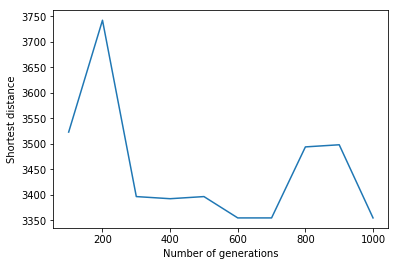

In [7]:
plt.plot(nb_generations, bests)
plt.xlabel("Number of generations")
plt.ylabel("Shortest distance")
plt.show()